# Basic usage of the `Chi2fit` package

This notebook is based on Piotr Przetacznik's [IElixir](https://hex.pm/packages/ielixir).

More information on `Chi2fit` can be found at:

* [Docker image](https://hub.docker.com/r/pietertje/chi2fit)
* [Github](https://github.com/piisgaaf/chi2fit)
* [Hex.pm](https://hex.pm/packages/chi2fit)


What to find in this notebook?

* [Example notebooks](#Example-notebooks)
* [Elixir tutorial](#Elixir tutorial)
* [`Chi2fit` Package](#Chi2fit-Package)
* [Available functions](#Available-functions)
* [Help](#Help)
    * [Help on modules](#Help-on-modules)
    * [Help on functions](#Help-on-functions)
* [Additional packages](#Additional-packages)
* [Usage](#Usage)
* [Special atoms](#Special-atoms)
* [Inline images](#Inline-images)
* [Command history](#Command-history)

## Example notebooks

A list of the notebooks that are available:

1. `README.ipynb` - this notebook ;-)
1. [`Forecasting-empirical-data.ipynb`](Forecasting-empirical-data.ipynb) - directly using the empirical data to forecast
1. [`Forecasting-bootstrapping.ipynb`](Forecasting-bootstrapping.ipynb) - estimation of the error of the forecast because the data set is limited
1. [`Forecasting-fit-to-known-distribution.ipynb`](Forecasting-fit-to-known-distribution.ipynb) - description of the empirical data by a known probability distribution and use this to forecast
1. [`Forecasting-non-equilibrium.ipynb`](Forecasting-non-equilibrium.ipynb) - analysis of changes in delivery rate to choose the most relevant and recent subsequence in the data set
1. [`Forecasting-multiplot.ipynb`](Forecasting-multiplot.ipynb) - demonstrates the use of multi plots

A suggested reading order is shown below.

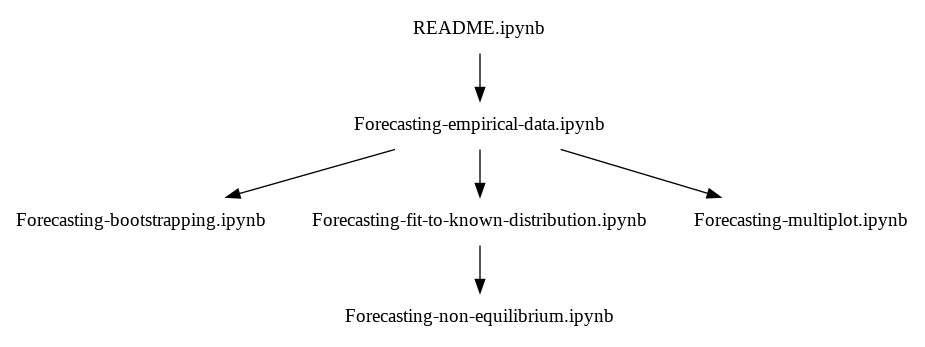

In [2]:
alias Graphvix.Graph, as: G
g = G.new node: [shape: "plaintext"]
{_, v1} = G.add_vertex g, "README.ipynb"
{_, v2} = G.add_vertex g, "Forecasting-empirical-data.ipynb"
{_, v3} = G.add_vertex g, "Forecasting-bootstrapping.ipynb"
{_, v4} = G.add_vertex g, "Forecasting-fit-to-known-distribution.ipynb"
{_, v5} = G.add_vertex g, "Forecasting-non-equilibrium.ipynb"
{_, v6} = G.add_vertex g, "Forecasting-multiplot.ipynb"
G.add_edge g, v1, v2
G.add_edge g, v2, v3
G.add_edge g, v2, v4
G.add_edge g, v4, v5
G.add_edge g, v2, v6
G.compile g, "/app/notebooks/images/readme", :png
{:"this is an inline image", src: "/app/notebooks/images/readme.png"}

Several examples are included. Use the menu `File -> open` to explore which ones are available. Use
thse to learn more about how to use `Chi2fit` or copy these as a basis for your own notes.

## Elixir tutorial

The notebooks are based on Jupyter and on the Elixir kernel. Commands and statements are entered using the language Elixir. There are many good tutorials on Elixir.

A good starting point is [Elixir's home](https://elixir-lang.org/).

New to Elixir? An introduction to Elixir can be found [here](https://elixir-lang.org/getting-started/introduction.html).

## `Chi2fit` Package

The `Chi2fit` package consists of the (Elixir) modules:

* [Distribution](https://hexdocs.pm/chi2fit/Chi2fit.Distribution.html#content)
* [FFT](https://hexdocs.pm/chi2fit/Chi2fit.FFT.html#content)
* [Fit](https://hexdocs.pm/chi2fit/Chi2fit.Fit.html#content)
* [Matrix](https://hexdocs.pm/chi2fit/Chi2fit.Matrix.html#content)
* [Root](https://hexdocs.pm/chi2fit/Chi2fit.Roots.html#content)
* [Utilities](https://hexdocs.pm/chi2fit/Chi2fit.Utilities.html#content)

And a module for drawing charts using [Gnuplot](https://hexdocs.pm/gnuplot/api-reference.html):

* [Gnuplotlib](https://hexdocs.pm/chi2fit/Gnuplotlib.html#content)

Finally, a contains the module `Chi2fit.Cli` for command line use outside of notebooks:

* [Cli](* [Cli](https://hexdocs.pm/chi2fit/Chi2fit.Cli.html#content)


List of all available modules (see https://stackoverflow.com/questions/41733712/elixir-list-all-modules-in-namespace):

In [4]:
:application.load :chi2fit
with {:ok, list} <- :application.get_key(:chi2fit, :modules) do
  list |> Enum.filter(& &1 |> Module.split |> Enum.take(1) == ~w|Chi2fit|)
end

[Chi2fit.Cli, Chi2fit.Distribution, Chi2fit.Distribution.UnsupportedDistributionError, Chi2fit.FFT, Chi2fit.Fit, Chi2fit.Matrix, Chi2fit.Roots, Chi2fit.Utilities, Chi2fit.Utilities.UnknownSampleErrorAlgorithmError]

## Available functions

The functions provided by the modules are visible using the `export` function:

In [5]:
exports Chi2fit.Distribution

bernoulli/1          coin/0               constant/1           dice/1               
dice_gk4/1           erlang/2             erlangCDF/2          exponential/1        
exponentialCDF/1     frechet/2            frechetCDF/2         guess/1              
guess/2              guess/3              model/1              model/2              
nakagami/2           nakagamiCDF/2        normal/2             normalCDF/2          
poisson/1            poissonCDF/1         sepCDF/4             sepCDF/5             
uniform/1            uniform/2            wald/2               waldCDF/2            
weibull/2            weibullCDF/2         


## Help

For all modules and function 'help' is available using the builtin command `h`.

#### Help on modules

In [6]:
h Chi2fit.Fit


                                  Chi2fit.Fit                                   

Implements fitting a distribution function to sample data. It minimizes the
liklihood function.

## Asymmetric Errors

To handle asymmetric errors the module provides three ways of determining the
contribution to the likelihood function:

    `simple` - value difference of the observable and model divided by the averaged error lower and upper bounds;
    `asimple` - value difference of the observable and model divided by the difference between upper/lower bound and the observed
      value depending on whether the model is larger or smaller than the observed value;
    `linear` - value difference of the observable and model divided by a linear tranformation (See below).

### 'linear': Linear transformation

Linear transformation that:

    - is continuous in u=0,
    - passes through the point sigma+ at u=1,
    - asymptotically reaches 1-y at u->infinity
    - pass through the point -sigma- at u=-1,
   

#### Help on functions

In [7]:
h Chi2fit.Distribution.erlangCDF


                            def erlangCDF(k, lambda)                            

    @spec erlangCDF(k :: number(), lambda :: number()) :: cdf()

The Erlang cumulative distribution function.



## Additional packages

The package `Chi2fit` is provided 'out-of-the-box' with this notebook. Additional packages can be installed from [Hex](http://hex.pm).

`IElixir` provides a mechanism using [`Boyle`](https://github.com/pprzetacznik/ielixir#package-management-with-boyle).

Suppose we want to use the functions provided by [`Decimal`](https://hex.pm/packages/decimal).

In [8]:
Boyle.mk("decimal_env")
Boyle.list()

All dependencies up to date


  mix.exs:1



{:ok, ["decimal_env"]}

In [9]:
Boyle.activate("decimal_env")
Boyle.install({:decimal, "~> 1.7"})

All dependencies up to date
Resolving Hex dependencies...
Dependency resolution completed:
New:
  decimal 1.7.0
* Getting decimal (Hex package)
==> decimal
Compiling 1 file (.ex)
Generated decimal app


  mix.exs:1

  lib/decimal.ex:13

  lib/decimal.ex:135

  lib/decimal.ex:162

  lib/decimal.ex:1866

  lib/decimal.ex:1872



:ok

In [10]:
sqrt2 = Decimal.sqrt("2")
Decimal.to_string(sqrt2)

"1.414213562373095048801688724"

In [11]:
ctxt = Decimal.get_context()
ctxt = %Decimal.Context{ctxt | precision: 50}
Decimal.set_context ctxt

:ok

In [12]:
sqrt2 = Decimal.sqrt("2")
Decimal.to_string(sqrt2)

"1.4142135623730950488016887242096980785696718753769"

In [13]:
Boyle.deactivate()

  mix.exs:1



:ok

## Usage

Function need to be specified using the module name and function name, for example if we want the value of the Erlang CDF we use the function `erlangCDF` in the module `Chi2fit.Distribution`:

In [14]:
f = Chi2fit.Distribution.erlangCDF 0.5,4.3
f.(0.1)

0.6462613084207343

We use an `alias` to have to type less:

In [15]:
alias Chi2fit.Distribution, as: D
f = D.erlangCDF 0.5,4.3
f.(0.1)

0.6462613084207343

We can rid of the `D.` alltogether by using `import`s:

In [16]:
import Chi2fit.Distribution
f = erlangCDF 0.5,4.3
f.(0.1)

0.6462613084207343

## Special atoms

`IElixir` provides three atoms that are interpreted by `IElixir`.

What is an atom? In Elixir an atom ia a variable for which its value is its name. For example, the atmo `:variable` is an atom and has `variable` as value.

The 3 special atoms in `IElixir` are:

* `:"this is raw html"` - the output result of the command is shown as is instead of an Elixir term
* `:"do not show this result in output"` - the output of the statement is not shown in the output cell
* `:"this is an inline image"` - used for displaying an image in the output cell (see below)

In addition to these atoms, the following tuple is interpreted:

* `{:"this is an inline image", src: path_to_image}` - used for displaying an image in the output cell (see below)


These are used by returning either one of these as the result of a command.

## Inline images

The atom `:"this is an inline image"` indicates that the output of the cell is to be interpreted as a base64 encoded image.

An example based on [Gnuplot](https://hex.pm/packages/gnuplot) is shown below.

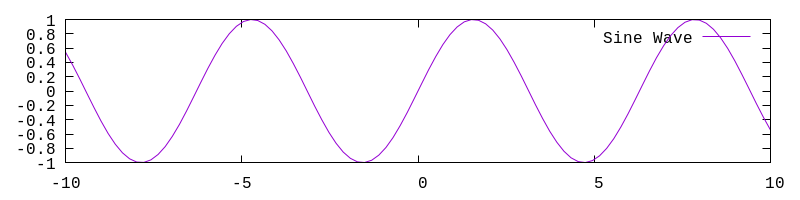

In [17]:
Gnuplot.plot([
  ~w(set terminal pngcairo size 800,200)a,
  ~w(set output)a,
  [:plot, 'sin(x)', :title, "Sine Wave"]
])
Gnuplotlib.capture() |> Base.encode64 |> IO.write
:"this is an inline image"

## Command history

`IElixir` supports a simple command history. The results of the last command is stored in the variable `ans`.

In [18]:
:math.sqrt(2)

1.4142135623730951

In [19]:
ans

1.4142135623730951

The history of the results of previous commands can be accessed using the variable `out`.

In [20]:
i(out)

Term
  %{3 => :ok, 4 => [Chi2fit.Cli, Chi2fit.Distribution, Chi2fit.Distribution.UnsupportedDistributionError, Chi2fit.FFT, Chi2fit.Fit, Chi2fit.Matrix, Chi2fit.Roots, Chi2fit.Utilities, Chi2fit.Utilities.UnknownSampleErrorAlgorithmError], 8 => {:ok, ["decimal_env"]}, 9 => :ok, 10 => "1.414213562373095048801688724", 11 => :ok, 12 => "1.4142135623730950488016887242096980785696718753769", 13 => :ok, 14 => 0.6462613084207343, 15 => 0.6462613084207343, 16 => 0.6462613084207343, 18 => 1.4142135623730951, 19 => 1.4142135623730951}
Data type
  Map
Reference modules
  Map
Implemented protocols
  Ecto.DataType, Poison.Decoder, Poison.Encoder, IEx.Info, Collectable, Inspect, Enumerable


In [22]:
out[10]

"1.414213562373095048801688724"